In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as sns
from datetime import time
import matplotlib.ticker as mtick
import matplotlib.dates as mdate

In [3]:
pip install python-binance

Note: you may need to restart the kernel to use updated packages.


In [1]:
from binance.client import Client
api_key = "SUA CHAVE"
api_secret = "SUA CHAVE"
client = Client(api_key,api_secret)

In [5]:
klines = client.get_historical_klines("ADAUSDT", Client.KLINE_INTERVAL_15MINUTE, "1 Jan, 2017")
klines

[[1523937600000,
  '0.25551000',
  '0.28800000',
  '0.25551000',
  '0.26709000',
  '2920063.72000000',
  1523938499999,
  '780532.99043220',
  1377,
  '1005341.03000000',
  '268584.05499170',
  '0'],
 [1523938500000,
  '0.26708000',
  '0.26869000',
  '0.26008000',
  '0.26301000',
  '2558095.43000000',
  1523939399999,
  '674961.73138540',
  1350,
  '967622.47000000',
  '254529.27903980',
  '0'],
 [1523939400000,
  '0.26301000',
  '0.26801000',
  '0.26290000',
  '0.26700000',
  '2003124.97000000',
  1523940299999,
  '533180.22274790',
  1163,
  '597436.41000000',
  '158948.69958590',
  '0'],
 [1523940300000,
  '0.26690000',
  '0.26705000',
  '0.26404000',
  '0.26664000',
  '662409.11000000',
  1523941199999,
  '176402.54079740',
  531,
  '319424.02000000',
  '85072.17555120',
  '0'],
 [1523941200000,
  '0.26660000',
  '0.27798000',
  '0.26602000',
  '0.26966000',
  '2042089.34000000',
  1523942099999,
  '551067.98624460',
  1321,
  '913770.68000000',
  '246636.75167990',
  '0'],
 [15239

In [6]:
df = pd.DataFrame(klines)
df = df.iloc[:,:6]
df.columns = ["Time","Open","High","Low","Close","Volume"]
df = df.set_index("Time")
df.index = pd.to_datetime(df.index,unit="ms")
df = df.astype(float)
df

,Open,High,Low,Close,Volume
Time,,,,,
2018-04-17 04:00:00,0.25551,0.28800,0.25551,0.26709,2920063.72
2018-04-17 04:15:00,0.26708,0.26869,0.26008,0.26301,2558095.43
2018-04-17 04:30:00,0.26301,0.26801,0.26290,0.26700,2003124.97
2018-04-17 04:45:00,0.26690,0.26705,0.26404,0.26664,662409.11
2018-04-17 05:00:00,0.26660,0.27798,0.26602,0.26966,2042089.34
...,...,...,...,...,...
2024-02-14 17:15:00,0.57130,0.57200,0.56940,0.57020,1237831.30
2024-02-14 17:30:00,0.57030,0.57030,0.56630,0.56740,3743038.10
2024-02-14 17:45:00,0.56730,0.56830,0.56590,0.56790,1683540.80


In [7]:
precos = df["Close"]
precos

Time
2018-04-17 04:00:00    0.26709
2018-04-17 04:15:00    0.26301
2018-04-17 04:30:00    0.26700
2018-04-17 04:45:00    0.26664
2018-04-17 05:00:00    0.26966
                        ...   
2024-02-14 17:15:00    0.57020
2024-02-14 17:30:00    0.56740
2024-02-14 17:45:00    0.56790
2024-02-14 18:00:00    0.56650
2024-02-14 18:15:00    0.56650
Name: Close, Length: 204053, dtype: float64

In [93]:
precos_max = precos.cummax()
drawdowns = precos/precos_max - 1
drawdow_maximo = drawdowns.min()
drawdow_maximo  
pct_drawdow_maximo = drawdow_maximo  *100
pct_drawdow_maximo = round(pct_drawdow_maximo,2)


In [71]:
a = pd.DataFrame(drawdowns)
a

,Close
Time,
2018-04-17 04:00:00,0.000000
2018-04-17 04:15:00,-0.015276
2018-04-17 04:30:00,-0.000337
2018-04-17 04:45:00,-0.001685
2018-04-17 05:00:00,0.000000
...,...
2024-02-14 17:15:00,-0.815767
2024-02-14 17:30:00,-0.816672
2024-02-14 17:45:00,-0.816511


In [72]:
dmax = a["Close"] == drawdow_maximo
dmax = a[dmax]
dmax

,Close
Time,
2020-03-13 02:00:00,-0.952268


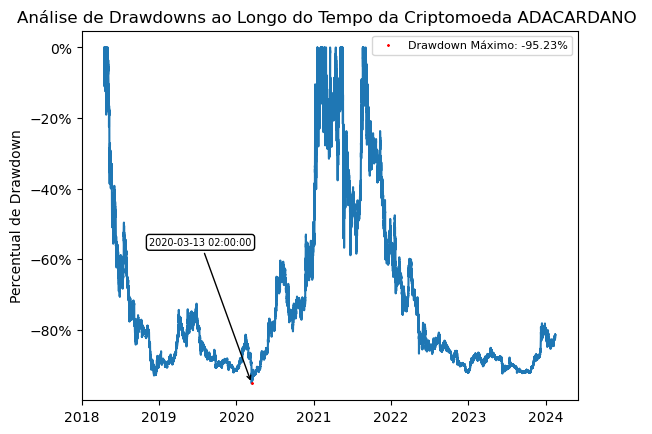

In [91]:
fig,ax = plt.subplots()
ax.set_ylabel('Percentual de Drawdown')
ax.set_title('Análise de Drawdowns ao Longo do Tempo da Criptomoeda ADACARDANO ')
ax.plot(drawdowns.index,drawdowns)
ax.plot(dmax.index[0], dmax.values[0], "X", color='red', markersize=1, label=f'Drawdown Máximo: {pct_drawdow_maximo}%')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.xaxis.set_major_locator(mdate.YearLocator(1))
ax.annotate(dmax.index[0],
            xy=(dmax.index[0], dmax.values[0]), xycoords='data',
            xytext=(dmax.index[0],dmax.values[0]+0.40), textcoords='data',
            ha="right", va="center", fontsize=7,
            bbox=dict(boxstyle="round", fc="w"),
            arrowprops=dict(arrowstyle="->"))
ax.legend(fontsize=8)
plt.show()